# Data analysis across scientific papers related to the propagule pressure  hypothesis

## Propagule pressure hypothesis:  A high propagule pressure (a composite measure consisting of the number of individuals introduced per introduction event and the frequency of introduction events) in a cause of invasion success.

## 1. Import the required libraries

In [52]:
import requests
import datetime
import pandas as pd
import numpy as np
from orkg import ORKG
from bokeh.io import export_png
from bokeh.models import ColumnDataSource,LabelSet, HoverTool, WheelZoomTool, ResetTool, SaveTool, PanTool, DatetimeTickFormatter, Whisker
from bokeh.plotting import figure, show, output_notebook
from bokeh.transform import cumsum
from bokeh.palettes import Category10



import matplotlib.pyplot as plt

from math import pi

import os
import re
output_notebook()

Loading BokehJS ...

## 2. Connect to ORKG and import the hypothesis comparison table

In [53]:
orkg = ORKG(host='https://orkg.org/orkg', simcomp_host='https://orkg.org/orkg/simcomp')

df = orkg.contributions.compare_dataframe(comparison_id='R55219')
df = df.T
df=df.rename(columns={'stand of hypothesis':'stand'})
#df

## 3. Preprocess the data

In [54]:
# put the titles of the papers in a column named "study"
df['study']=df.iloc[:, 0]
df = df.reset_index()
# rename columns
#df.rename(columns={' Phenotypic plasticity form': 'Phenotypic plasticity form'}, inplace=True)
df

,index,Research Method,Continent,Measure of invasion success,hypothesis,stand,type of experiment,Habitat,Investigated species,Number of species,has research problem,Measure of propagule pressure,Study date,study
0,Number of source populations as a potential dr...,Observational or correlational,South America,Abundance,Propagule pressure,Supported,Field,Terrestrial,Plants,16,Testing the propagule pressure hypothesis in i...,Propagule size,2013,Observational or correlational
1,Number of source populations as a potential dr...,Observational or correlational,South America,Spread,Propagule pressure,Supported,Field,Terrestrial,Plants,16,Testing the propagule pressure hypothesis in i...,Propagule size,2013,Observational or correlational
2,Biological control as an invasion process: dis...,Experimental,North America,Abundance,Propagule pressure,Undecided,Field,Terrestrial,Insects,4,Testing the propagule pressure hypothesis in i...,Total number released,2012,Experimental
3,Biological control as an invasion process: dis...,Experimental,North America,Spread,Propagule pressure,Undecided,Field,Terrestrial,Insects,4,Testing the propagule pressure hypothesis in i...,Total number released,2012,Experimental
4,Biological control as an invasion process: dis...,Experimental,North America,Survival,Propagule pressure,Undecided,Field,Terrestrial,Insects,4,Testing the propagule pressure hypothesis in i...,Total number released,2012,Experimental
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,Quarantine arthropod invasions in Europe: the ...,Observational or correlational,Europe,Establishment,Propagule pressure,Undecided,Field,Terrestrial/Freshwater/Marine,Any invertebrates,118,Testing the propagule pressure hypothesis in i...,Other proxies,2014,Observational or correlational
115,The vulnerability of habitats to plant invasio...,Observational or correlational,Oceania,Species richness,Propagule pressure,Supported,Field,Terrestrial,Plants,301,Testing the propagule pressure hypothesis in i...,Distance from source,2012,Observational or correlational
116,Founder population size and number of source p...,Experimental,Europe,"Recruitment, reproduction",Propagule pressure,Supported,Field,Freshwater,Insects,1,Testing the propagule pressure hypothesis in i...,Propagule size,2003,Experimental
117,Non-indigenous woody invasive plants in a rura...,Observational or correlational,North America,Abundance,Propagule pressure,Supported,Field,Terrestrial,Plants,12,Testing the propagule pressure hypothesis in i...,Distance from source,2004,Observational or correlational


### The main hypothesis is divided into 5 sub hypotheses according to the measure of propagule pressure.

## 4.  Analytical questions

## Question 1: How many research contributions have discussed the propagule pressure hypothesis? How many contributions support, are undecided, or question the hypothesis?

### The main hypothesis

In [55]:
df_stand = df.value_counts(['stand']).reset_index(name='count')
df_stand

,stand,count
0,Supported,90
1,Questioned,18
2,Undecided,11


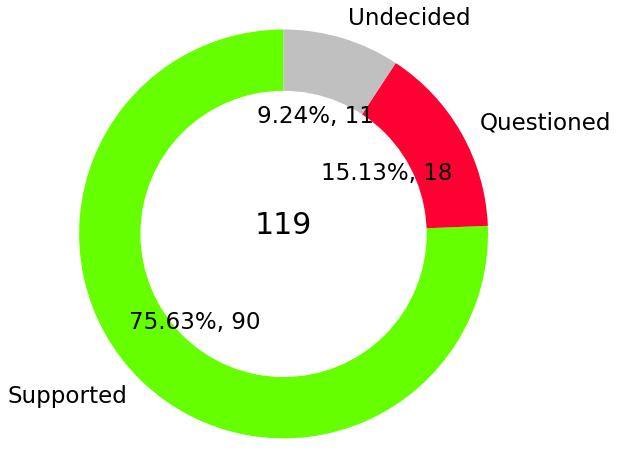

In [56]:
# With matplotlib
labels = np.array(df_stand["stand"]).astype(str)
sizes = np.array(df_stand["count"]).astype(int) 
colors = ['#66FF00','#FF0033','#C0C0C0']




fig1, ax1 = plt.subplots(figsize=(9, 7))
#patches, texts, autotexts = 
ax1.pie(sizes, colors = colors, labels=labels, autopct=lambda p:f'{p:.2f}%, {p*sum(sizes)/100 :.0f} ', startangle=90)
# Create a circle for the center of the plot
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.text(0, 0,"119", ha='center',fontsize=30)
#plt.title("Propagule pressure Hypothesis",fontsize=20)
#autotexts[0].set_fontsize(15)
#texts[0].set_fontsize(15)
#texts[2].set_fontsize(15)

plt.rcParams.update({'font.size': 23})

plt.savefig("img/main_hyp.png")
plt.show()

### Result: This hypothesis is discussed in 119 contributions and it is widely supported in the literature. More than 75% of the contributions support the hypothesis (i.e., 90 out of 119), while  15% (18 contributions) question it, and 10% (11 contributions) are undecided. 

## Question 2: How many contributions have discussed each of the sub hypothesis of propagule pressure? How many contributions support, are undecided, or question each sub hypothesis?

### The first sub hypothesis considers the total number released as the measure of propagule pressure.

In [57]:
#df_number = df[df['Measure of propagule pressure'].str.contains('Total number released')]
df_number = df[df['Measure of propagule pressure']=='Total number released']

df_number_grouped = df_number.value_counts(['stand']).reset_index(name='count')
df_number_grouped 

,stand,count
0,Supported,15
1,Undecided,3
2,Questioned,1


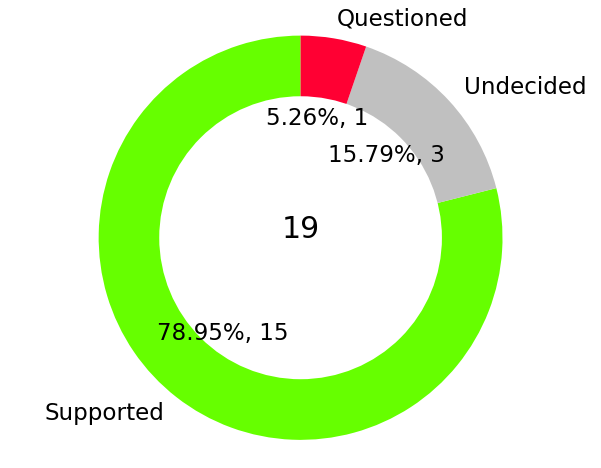

In [58]:
labels = np.array(df_number_grouped["stand"]).astype(str)
sizes = np.array(df_number_grouped["count"]).astype(int) 
colors = ['#66FF00','#C0C0C0','#FF0033']


fig1, ax1 = plt.subplots(figsize=(9, 7))
ax1.pie(sizes, colors = colors, labels=labels, autopct=lambda p:f'{p:.2f}%, {p*sum(sizes)/100 :.0f} ', startangle=90)
# Create a circle for the center of the plot
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.text(0, 0,"19", ha='center',fontsize=30)
#plt.title("Total number released",fontsize=20)
plt.rcParams.update({'font.size': 23})


plt.savefig("img/sub_1.png")


plt.show()

### The second sub hypothesis considers the propagule size as the measure of propagule pressure.

In [59]:
df_size = df[df['Measure of propagule pressure'].str.contains('Propagule size')]

df_size_grouped = df_size.value_counts(['stand']).reset_index(name='count')
df_size_grouped 

,stand,count
0,Supported,38
1,Questioned,11


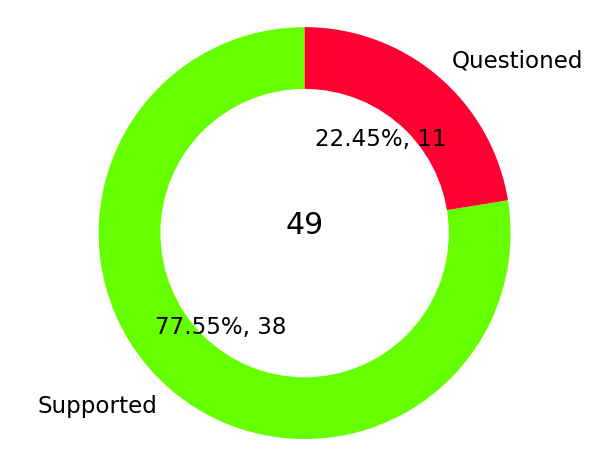

In [60]:
labels = np.array(df_size_grouped["stand"]).astype(str)
sizes = np.array(df_size_grouped["count"]).astype(int) 
colors = ['#66FF00','#FF0033','#C0C0C0']


fig1, ax1 = plt.subplots(figsize=(9, 7))
ax1.pie(sizes, colors = colors, labels=labels, autopct=lambda p:f'{p:.2f}%, {p*sum(sizes)/100 :.0f} ', startangle=90)
# Create a circle for the center of the plot
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.text(0, 0,"49", ha='center',fontsize=30)
#plt.title("Propagule size",fontsize=20)
plt.rcParams.update({'font.size': 23})

plt.savefig("img/sub_2.png")

plt.show()

### The third sub hypothesis considers the propagule frequency as the measure of propagule pressure.

In [61]:
df_freq = df[df['Measure of propagule pressure'].str.contains('Propagule frequency')]
df_freq_grouped = df_freq.value_counts(['stand']).reset_index(name='count')
df_freq_grouped 

,stand,count
0,Supported,10
1,Questioned,5
2,Undecided,2


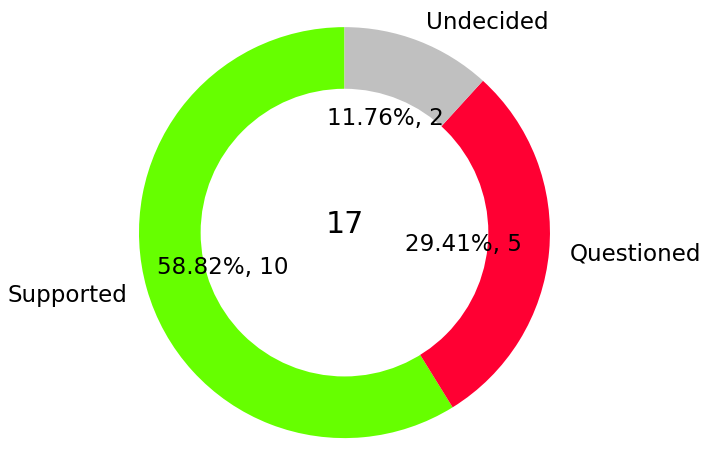

In [62]:
labels = np.array(df_freq_grouped["stand"]).astype(str)
sizes = np.array(df_freq_grouped["count"]).astype(int) 
colors = ['#66FF00','#FF0033','#C0C0C0']


fig1, ax1 = plt.subplots(figsize=(9, 7))
ax1.pie(sizes, colors = colors, labels=labels, autopct=lambda p:f'{p:.2f}%, {p*sum(sizes)/100 :.0f} ', startangle=90)
# Create a circle for the center of the plot
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.text(0, 0,"17", ha='center',fontsize=30)
#plt.title("Propagule frequency",fontsize=20)
plt.rcParams.update({'font.size': 23})

plt.savefig("img/sub_3.png")

plt.show()

### The fourth sub hypothesis considers the distance from source as the measure of propagule pressure.

In [63]:
df_distance = df[df['Measure of propagule pressure']=='Distance from source']
df_distance_grouped = df_distance.value_counts(['stand']).reset_index(name='count')
df_distance_grouped 

,stand,count
0,Supported,13
1,Undecided,3


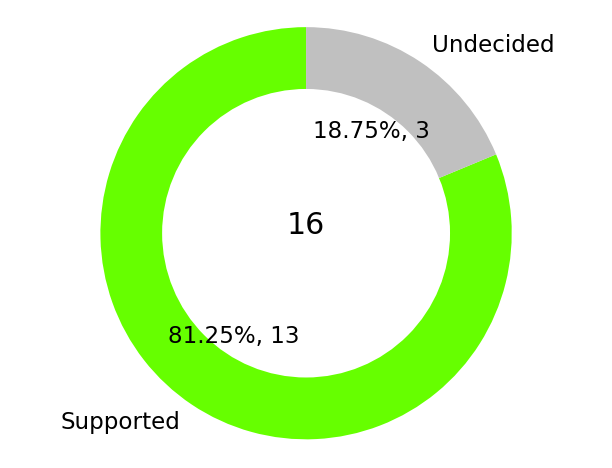

In [64]:
labels = np.array(df_distance_grouped["stand"]).astype(str)
sizes = np.array(df_distance_grouped["count"]).astype(int) 
colors = ['#66FF00','#C0C0C0']


fig1, ax1 = plt.subplots(figsize=(9, 7))
ax1.pie(sizes, colors = colors, labels=labels, autopct=lambda p:f'{p:.2f}%, {p*sum(sizes)/100 :.0f} ', startangle=90)
# Create a circle for the center of the plot
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.text(0, 0,"16", ha='center',fontsize=30)
#plt.title("Distance from source",fontsize=20)
plt.rcParams.update({'font.size': 23})

plt.savefig("img/sub_4.png")

plt.show()

### The fifth sub hypothesis considers the other proxies as the measure of propagule pressure.

In [65]:
df_proxies = df[df['Measure of propagule pressure']=='Other proxies']
df_proxies_grouped = df_proxies.value_counts(['stand']).reset_index(name='count')
df_proxies_grouped 

,stand,count
0,Supported,13
1,Undecided,3
2,Questioned,1


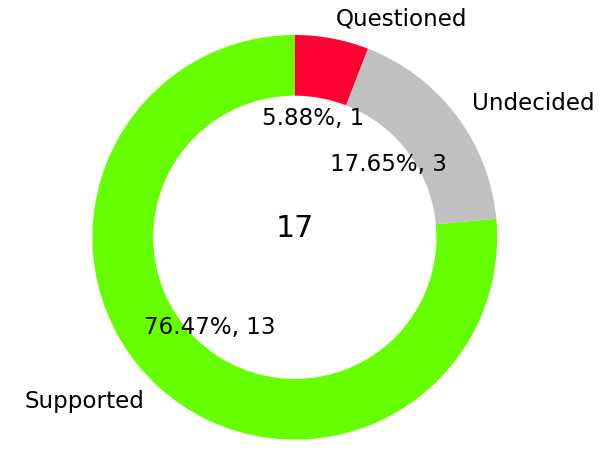

In [66]:
labels = np.array(df_proxies_grouped["stand"]).astype(str)
sizes = np.array(df_proxies_grouped["count"]).astype(int) 
colors = ['#66FF00','#C0C0C0','#FF0033']

fig1, ax1 = plt.subplots(figsize=(9, 7))
ax1.pie(sizes, colors = colors, labels=labels, autopct=lambda p:f'{p:.2f}%, {p*sum(sizes)/100 :.0f} ', startangle=90)
# Create a circle for the center of the plot
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.text(0, 0,"17", ha='center',fontsize=30)
#plt.title("Various proxies",fontsize=20)
plt.rcParams.update({'font.size': 23})

plt.savefig("img/sub_5.png")

plt.show()

### Result: Most of the literature considers the propagule size as a measure of propagule pressure (49 out of 119 contributions), and as in the main hypothesis, the five sub-hypotheses are widely supported.

## The hierarchy of the hypothesis: Create a graph visualization of the main and sub hypotheses and save it in a pdf file.

In [67]:
from graphviz import Digraph
g = Digraph('G', filename='img/propagule_pressure.gv')
g.edge('A', 'B')
g.edge('A', 'C')
g.edge('A', 'D')
g.edge('A', 'E')
g.edge('A', 'F')
g.node('A', shape='none',label="", image="main_hyp.PNG")
g.node('B', shape='none',label="", image="sub_1.PNG")
g.node('C', shape='none',label="", image="sub_2.PNG")
g.node('D', shape='none',label="", image="sub_3.PNG")
g.node('E', shape='none',label="", image="sub_4.PNG")
g.node('F', shape='none',label="", image="sub_5.PNG")
g.view()

'img\\propagule_pressure.gv.pdf'

## Show the graph visualizaion here in the notebook

In [68]:
class PDF(object):
  def __init__(self, pdf, size=(200,200)):
    self.pdf = pdf
    self.size = size

  def _repr_html_(self):
    return '<iframe src={0} width={1[0]} height={1[1]}></iframe>'.format(self.pdf, self.size)

  def _repr_latex_(self):
    return r'\includegraphics[width=1.0\textwidth]{{{0}}}'.format(self.pdf)

PDF('img\propagule_pressure.gv.pdf',size=(1000,950))

## To test the hypothesis, some articles investigated plant taxa while others investigated non-plant taxa such as birds, reptiles, etc.

## We first look at the articles that investigated plant taxa

## Question 3: How many plant taxa did each article investigate? Which articles investigated the highest numbers of plant taxa?

In [69]:
df['Number of species'] = df['Number of species'].astype(int)

In [70]:
df_plants = df[df['Investigated species']=='Plants']
df_plants

,index,Research Method,Continent,Measure of invasion success,hypothesis,stand,type of experiment,Habitat,Investigated species,Number of species,has research problem,Measure of propagule pressure,Study date,study
0,Number of source populations as a potential dr...,Observational or correlational,South America,Abundance,Propagule pressure,Supported,Field,Terrestrial,Plants,16,Testing the propagule pressure hypothesis in i...,Propagule size,2013,Observational or correlational
1,Number of source populations as a potential dr...,Observational or correlational,South America,Spread,Propagule pressure,Supported,Field,Terrestrial,Plants,16,Testing the propagule pressure hypothesis in i...,Propagule size,2013,Observational or correlational
17,"Habitat, dispersal and propagule pressure cont...",Observational or correlational,North America,Abundance,Propagule pressure,Supported,Field,Terrestrial,Plants,1,Testing the propagule pressure hypothesis in i...,Total number released,2013,Observational or correlational
21,Residence time and human-mediated propagule pr...,Observational or correlational,South America,Abundance,Propagule pressure,Supported,Field,Terrestrial,Plants,870,Testing the propagule pressure hypothesis in i...,Other proxies,2010,Observational or correlational
22,Propagule pressure and resource availability d...,Experimental,North America,Cover,Propagule pressure,Supported,Field,Terrestrial,Plants,2,Testing the propagule pressure hypothesis in i...,Propagule size,2009,Experimental
23,Propagule pressure and resource availability d...,Experimental,North America,Biomass,Propagule pressure,Supported,Field,Terrestrial,Plants,2,Testing the propagule pressure hypothesis in i...,Propagule size,2009,Experimental
28,"Planting intensity, residence time, and specie...",Observational or correlational,North America,Establishment,Propagule pressure,Supported,Field,Terrestrial,Plants,109,Testing the propagule pressure hypothesis in i...,Other proxies,2009,Observational or correlational
29,The comparative importance of species traits a...,Observational or correlational,Africa,Establishment,Propagule pressure,Supported,Field,Terrestrial,Plants,39,Testing the propagule pressure hypothesis in i...,Total number released,2011,Observational or correlational
30,The comparative importance of species traits a...,Observational or correlational,Africa,Establishment,Propagule pressure,Supported,Field,Terrestrial,Plants,39,Testing the propagule pressure hypothesis in i...,Distance from source,2011,Observational or correlational
31,Propagule pressure hypothesis not supported by...,Experimental,South America,Establishment,Propagule pressure,Questioned,Field,Terrestrial,Plants,18,Testing the propagule pressure hypothesis in i...,Propagule frequency,2011,Experimental


In [71]:
dates = np.array(df_plants['Study date'])
dates

array(['2013', '2013', '2013', '2010', '2009', '2009', '2009', '2011',
       '2011', '2011', '2011', '2011', '2007', '2003', '2010', '2013',
       '2010', '2010', '2006', '2006', '2006', '2008', '2008', '2009',
       '2005', '2005', '1996', '1997', '2001', '2004', '2004', '2011',
       '2009', '2013', '2009', '2012', '2008', '2009', '2004', '2008',
       '2008', '2011', '2011', '2011', '2009', '2009', '2012', '2004',
       '2001'], dtype=object)

In [72]:
plants = np.array(df_plants['Number of species'])
plants

array([ 16,  16,   1, 870,   2,   2, 109,  39,  39,  18,  18,  25,  39,
         3,   2,   1, 407, 407,   1, 180,  28,   8,   1,   1,  10,  10,
         1,  47, 168,   1,  32,   3,   3,   1,   1,   1,   1, 214,  10,
         1,   1, 441,   3,   3, 582,   7, 301,  12,   4])

In [73]:
studies = np.array(df_plants['index'])
stand_of = np.array(df_plants['stand'])

In [74]:
df9 = pd.DataFrame(data=dict( stud=studies,dates=dates,value=plants,stand=stand_of))

hover1 = HoverTool(
    tooltips=[
        ('Article', '@stud'),
        ('Number of taxa', '@value'),
        ('Article date', '@dates'),
        ('Stand of hypothesis', '@stand')
    ],
        formatters={
        '@dates': 'printf',
        '@{value}' : 'printf',
        '@{stud}' : 'printf',
         '@{stand}' : 'printf'
    }
)

source = ColumnDataSource(df9)
p = figure(x_range= studies,
     plot_height=500, plot_width=970, toolbar_location=None, 
            tools=[hover1,WheelZoomTool(), PanTool(), ResetTool(), SaveTool()],
           x_axis_label='Article',
           y_axis_label='Number of plant taxa',
     #     title="Number of plant species in each study"
          )

p.vbar(x='stud',top='value', width=0.9, color='#718dbf',source=source)
#p.xaxis.major_label_orientation = "vertical"
p.xaxis.axis_label_text_font_size = "20pt"
p.xaxis.major_label_text_font_size = '0pt' # disable ticks labels
p.yaxis.axis_label_text_font_size = "20pt"
p.title.text_font_size = '15pt'


p.yaxis.major_label_text_font_size = '11pt'
p.yaxis.major_label_text_font_style = 'bold'

p.xaxis.axis_label_text_font_style = 'bold'
p.yaxis.axis_label_text_font_style = 'bold'


show(p)

In [75]:
export_png(p, filename='img/num_plant_species.png')

'C:\\Users\\User\\2-Masterarbeit\\Final_Upload\\invasion_biology\\hypotheses_notebooks\\propagule_pressure\\img\\num_plant_species.png'

In [76]:
df_plants_top = df_plants.sort_values(by=['Number of species'],ascending=False)
df_plants_top = df_plants_top.head(10)

In [77]:
dates = np.array(df_plants_top['Study date'])
plants = np.array(df_plants_top['Number of species'])
studies = np.array(df_plants_top['index'])
stand_of = np.array(df_plants_top['stand'])


In [78]:
df99 = pd.DataFrame(data=dict( stud=studies,dates=dates,value=plants,stand=stand_of))

hover1 = HoverTool(
    tooltips=[
        ('Article', '@stud'),
        ('Number of taxa', '@value'),
        ('Article date', '@dates'),
        ('Stand of hypothesis', '@stand')
    ],
        formatters={
        '@dates': 'printf',
        '@{value}' : 'printf',
        '@{stud}' : 'printf',
         '@{stand}' : 'printf'
    }
)

source = ColumnDataSource(df9)
p = figure(x_range= studies,
     plot_height=500, plot_width=970, toolbar_location=None, 
            tools=[hover1,WheelZoomTool(), PanTool(), ResetTool(), SaveTool()],
           x_axis_label='Article',
           y_axis_label='Number of plant taxa',
     #     title="Number of plant species in each study"
          )

p.vbar(x='stud',top='value', width=0.9, color='#718dbf',source=source)
#p.xaxis.major_label_orientation = "vertical"
p.xaxis.axis_label_text_font_size = "20pt"
p.yaxis.axis_label_text_font_size = "20pt"
p.title.text_font_size = '15pt'
p.xaxis.major_label_text_font_size = '0pt' # disable ticks labels

p.yaxis.major_label_text_font_size = '11pt'
p.yaxis.major_label_text_font_style = 'bold'

p.xaxis.axis_label_text_font_style = 'bold'
p.yaxis.axis_label_text_font_style = 'bold'
#p.xaxis.major_label_orientation = pi/50

show(p)

In [79]:
export_png(p, filename='img/num_plant_species_top.png')

'C:\\Users\\User\\2-Masterarbeit\\Final_Upload\\invasion_biology\\hypotheses_notebooks\\propagule_pressure\\img\\num_plant_species_top.png'

## Now we look at the non-plant taxa

## Question 4: How many non-plant taxa did each article investigate? Which articles investigated the highest numbers of non-plant taxa?

In [80]:
df_other = df[df['Investigated species']!='Plants']
df_other

,index,Research Method,Continent,Measure of invasion success,hypothesis,stand,type of experiment,Habitat,Investigated species,Number of species,has research problem,Measure of propagule pressure,Study date,study
2,Biological control as an invasion process: dis...,Experimental,North America,Abundance,Propagule pressure,Undecided,Field,Terrestrial,Insects,4,Testing the propagule pressure hypothesis in i...,Total number released,2012,Experimental
3,Biological control as an invasion process: dis...,Experimental,North America,Spread,Propagule pressure,Undecided,Field,Terrestrial,Insects,4,Testing the propagule pressure hypothesis in i...,Total number released,2012,Experimental
4,Biological control as an invasion process: dis...,Experimental,North America,Survival,Propagule pressure,Undecided,Field,Terrestrial,Insects,4,Testing the propagule pressure hypothesis in i...,Total number released,2012,Experimental
5,Biological control as an invasion process: dis...,Experimental,North America,Abundance,Propagule pressure,Undecided,Field,Terrestrial,Insects,4,Testing the propagule pressure hypothesis in i...,Distance from source,2012,Experimental
6,Biological control as an invasion process: dis...,Experimental,North America,Spread,Propagule pressure,Undecided,Field,Terrestrial,Insects,4,Testing the propagule pressure hypothesis in i...,Distance from source,2012,Experimental
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,Animal trade and non-indigenous species introd...,Observational or correlational,All continents except Antarctica,Establishment,Propagule pressure,Supported,Field,Terrestrial,Mammals,20,Testing the propagule pressure hypothesis in i...,Propagule frequency,2009,Observational or correlational
112,Colonization Success in Roesel's Bush-Cricket ...,Experimental,Europe,"Recruitment, reproduction",Propagule pressure,Supported,Field,Terrestrial,Insects,1,Testing the propagule pressure hypothesis in i...,Propagule size,2001,Experimental
113,Propagule pressure and stream characteristics ...,Observational or correlational,North America,Introgression with native salmonids,Propagule pressure,Supported,Field,Freshwater,Fishes,1,Testing the propagule pressure hypothesis in i...,Other proxies,2010,Observational or correlational
114,Quarantine arthropod invasions in Europe: the ...,Observational or correlational,Europe,Establishment,Propagule pressure,Undecided,Field,Terrestrial/Freshwater/Marine,Any invertebrates,118,Testing the propagule pressure hypothesis in i...,Other proxies,2014,Observational or correlational


In [81]:
#df_other['Study date'] = pd.to_datetime(df_other['Study date'].astype(str), format='%Y')
dates_other = np.array(df_other['Study date']).astype(str)
dates_other

array(['2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012',
       '2012', '2012', '2012', '2013', '1998', '1998', '2011', '1996',
       '1996', '2012', '2013', '2000', '2009', '2009', '2007', '2007',
       '2013', '2012', '2011', '2008', '2005', '2004', '2004', '2007',
       '2007', '2012', '2010', '2006', '2006', '2013', '2013', '2007',
       '2000', '2014', '1989', '1989', '2010', '2010', '2004', '2004',
       '2001', '2001', '1997', '2004', '2005', '2005', '2009', '2010',
       '2007', '2009', '2004', '2004', '2013', '2008', '2013', '2013',
       '2011', '2009', '2001', '2010', '2014', '2003'], dtype='<U4')

In [82]:
species_other = np.array(df_other['Investigated species'])
stand_of_other = np.array(df_other['stand'])

In [83]:
number_other = np.array(df_other['Number of species'])
studies_other = np.array(df_other['index'])
#palette = ['#FA8072','#006666','#60d4cb','#ee4d2e','#efd566','#00ffbf','#8000ff','#996666','#ffb3b3','#330000','#867979','#ff00bf','#80ff00','#ff8000','#efbaca']

In [84]:
df10 = pd.DataFrame(data=dict(stud=studies_other,dates=dates_other,value=number_other,species=species_other,stand=stand_of_other))
#df10

In [85]:
hover1 = HoverTool(
    tooltips=[
        ('Article', '@stud'),
        ('Number of taxa', '@value'),
        ('Article date', '@dates'),
        ('Investigated taxon', '@species'),
        ('Stand of hypothsis', '@stand')
    ],
        formatters={
        '@dates': 'printf',
        '@{value}' : 'printf',
        '@{stud}' : 'printf',
        '@{species}' : 'printf',
        '@{stand}' : 'printf'
    }
)

source = ColumnDataSource(df10)
p = figure(x_range= studies_other,
     plot_height=500, plot_width=970, toolbar_location=None, 
            tools=[hover1,WheelZoomTool(), PanTool(), ResetTool(), SaveTool()],
           x_axis_label='Article',
           y_axis_label='Number of non-plant taxa',
     #     title="Number of non-plant species in each study"
          )

p.vbar(x='stud',top='value', width=0.9, color='#718dbf',source=source)
#p.xaxis.major_label_orientation = "vertical"
p.xaxis.axis_label_text_font_size = "20pt"
p.yaxis.axis_label_text_font_size = "20pt"
p.title.text_font_size = '15pt'
p.xaxis.major_label_text_font_size = '0pt' # disable ticks labels

p.yaxis.major_label_text_font_size = '11pt'
p.yaxis.major_label_text_font_style = 'bold'

p.xaxis.axis_label_text_font_style = 'bold'
p.yaxis.axis_label_text_font_style = 'bold'



show(p)

In [86]:
export_png(p, filename='img/num_non-plant_species.png')

'C:\\Users\\User\\2-Masterarbeit\\Final_Upload\\invasion_biology\\hypotheses_notebooks\\propagule_pressure\\img\\num_non-plant_species.png'

In [87]:
df_other_top = df_other.sort_values(by=['Number of species'],ascending=False)
df_other_top = df_other_top.head(10)

In [88]:
dates_other = np.array(df_other_top['Study date']).astype(str)
species_other = np.array(df_other_top['Investigated species'])
stand_of_other = np.array(df_other_top['stand'])
number_other = np.array(df_other_top['Number of species'])
studies_other = np.array(df_other_top['index'])


In [89]:
df1010 = pd.DataFrame(data=dict(stud=studies_other,dates=dates_other,value=number_other,species=species_other,stand=stand_of_other))
hover1 = HoverTool(
    tooltips=[
        ('Article', '@stud'),
        ('Number of taxa', '@value'),
        ('Article date', '@dates'),
        ('Investigated taxon', '@species'),
        ('Stand of hypothsis', '@stand')
    ],
        formatters={
        '@dates': 'printf',
        '@{value}' : 'printf',
        '@{stud}' : 'printf',
        '@{species}' : 'printf',
        '@{stand}' : 'printf'
    }
)

source = ColumnDataSource(df1010)
p = figure(x_range= studies_other,
     plot_height=500, plot_width=970, toolbar_location=None, 
            tools=[hover1,WheelZoomTool(), PanTool(), ResetTool(), SaveTool()],
           x_axis_label='Article',
           y_axis_label='Number of non-plant taxa',
     #     title="Number of non-plant species in each study"
          )

p.vbar(x='stud',top='value', width=0.9, color='#718dbf',source=source)
#p.xaxis.major_label_orientation = "vertical"
p.xaxis.axis_label_text_font_size = "20pt"
p.yaxis.axis_label_text_font_size = "20pt"
p.title.text_font_size = '15pt'

p.xaxis.major_label_text_font_size = '0pt' # disable ticks labels

p.yaxis.major_label_text_font_size = '11pt'
p.yaxis.major_label_text_font_style = 'bold'

p.xaxis.axis_label_text_font_style = 'bold'
p.yaxis.axis_label_text_font_style = 'bold'




show(p)

In [90]:
export_png(p, filename='img/num_non-plant_species_top.png')

'C:\\Users\\User\\2-Masterarbeit\\Final_Upload\\invasion_biology\\hypotheses_notebooks\\propagule_pressure\\img\\num_non-plant_species_top.png'

## Question 5: The literature tests the hypotheses by examining plant and non-plant taxa. What exactly are these non-plant taxa? How many articles investigated each taxon?

In [91]:
Plants = df['Investigated species'].str.count("Plants").sum()
Reptiles = df['Investigated species'].str.count("Reptiles").sum()
Birds = df['Investigated species'].str.count("Birds").sum()
Fishes = df['Investigated species'].str.count("Fishes").sum()
Mammals = df['Investigated species'].str.count("Mammals").sum()
Molluscs = df['Investigated species'].str.count("Molluscs").sum()
Insects = df['Investigated species'].str.count("Insects").sum()
Crustaceans = df['Investigated species'].str.count("Crustaceans").sum()
Algae = df['Investigated species'].str.count("Algae").sum()
Other_invertebrates = df['Investigated species'].str.count("Other invertebrates").sum()



data = {'Investigated species':['Plants', 'Reptiles', 'Birds', 'Fishes','Mammals','Molluscs','Insects',
                                'Crustaceans','Algae','Other invertebrates'],
        'count':[Plants, Reptiles, Birds, Fishes, Mammals,Molluscs,Insects,Crustaceans,Algae,Other_invertebrates]} 
df_species = pd.DataFrame(data)
df_species = df_species.sort_values(by=['count'],ascending=False)
df_species

,Investigated species,count
0,Plants,49
6,Insects,25
2,Birds,18
3,Fishes,11
4,Mammals,8
7,Crustaceans,3
5,Molluscs,2
1,Reptiles,1
8,Algae,1
9,Other invertebrates,1


In [92]:
spec = np.array(df_species['Investigated species'])
count_spec = np.array(df_species['count'])
palette = ['#80ff00','#ff8000','#00ffbf','#FFEFD5','#006400','#808000','#00FFFF','#4682B4','#e35d6a','#423a28']

In [42]:
df11 = pd.DataFrame(data=dict(species=spec,counts=count_spec,color=palette))

hover1 = HoverTool(
    tooltips=[
        ('Investigated taxon', '@species'),
        ('Number of articles', '@counts')
    ],
        formatters={
        '@species': 'printf',
        '@{counts}' : 'printf'
        }
)

source = ColumnDataSource(df11)
p = figure(x_range= spec,
     plot_height=500, plot_width=970, toolbar_location=None, 
            tools=[hover1,WheelZoomTool(), PanTool(), ResetTool(), SaveTool()],
           x_axis_label='Investigated taxon',
           y_axis_label='Number of articles',
 #         title="Number of studies for each investigated species"
          )

p.vbar(x='species',top='counts', width=0.9,color='color',source=source)
#p.xaxis.major_label_orientation = "vertical"
p.xaxis.axis_label_text_font_size = "20pt"
p.yaxis.axis_label_text_font_size = "20pt"
#p.title.text_font_size = '15pt'

p.xaxis.major_label_orientation = pi/12


# ticks labels font size
p.yaxis.major_label_text_font_size = '11pt'
p.xaxis.major_label_text_font_size = '14pt'

# ticks labels font style
p.yaxis.major_label_text_font_style = 'bold'
p.xaxis.major_label_text_font_style = 'bold'

# axis label font style
p.xaxis.axis_label_text_font_style = 'bold'
p.yaxis.axis_label_text_font_style = 'bold'





show(p)

In [43]:
export_png(p, filename='img/investigated_taxa.png')

'C:\\Users\\User\\2-Masterarbeit\\Final_Upload\\invasion_biology\\hypotheses_notebooks\\propagule_pressure\\img\\investigated_taxa.png'

## Question 6: When were the relevant articles published? In other words, what are the most productive years in terms of publishing articles related to this hypothesis?

In [44]:
df_study_date = df.value_counts(['Study date']).reset_index(name='count')
df_study_date=df_study_date.sort_values(by=['count'],ascending=False)
df_study_date

,Study date,count
0,2012,16
1,2009,14
2,2013,13
3,2011,12
4,2004,11
5,2010,9
6,2008,7
7,2007,7
10,2001,5
9,2006,5


In [45]:
study_date = np.array(df_study_date['Study date'])
count_dates = np.array(df_study_date['count'])
palette = ['#996666','#ffb3b3','#330000','#867979','#ff00bf','#80ff00','#ff8000','#00ffbf','#FFEFD5','#006400','#808000',
           '#00FFFF','#4682B4','#e35d6a','#423a28','#c6e2ff','#ecc226','#046070']

In [46]:
df20 = pd.DataFrame(data=dict(dates=study_date,counts=count_dates,color=palette))

hover1 = HoverTool(
    tooltips=[
        ('Article date', '@dates'),
        ('Number of articles', '@counts')
    ],
        formatters={
        '@dates': 'printf',
        '@{counts}' : 'printf'
        }
)

source = ColumnDataSource(df20)
p = figure(x_range= study_date,
     plot_height=500, plot_width=970, toolbar_location=None, 
            tools=[hover1,WheelZoomTool(), PanTool(), ResetTool(), SaveTool()],
           x_axis_label='Puplication year',
           y_axis_label='Number of articles',
    #      title="Number of studies in each year"
          )

p.vbar(x='dates',top='counts', width=0.9,color='color',source=source)
#p.xaxis.major_label_orientation = "vertical"
p.xaxis.axis_label_text_font_size = "20pt"
p.yaxis.axis_label_text_font_size = "20pt"
p.title.text_font_size = '15pt'


p.xaxis.major_label_orientation = pi/12


# ticks labels font size
p.yaxis.major_label_text_font_size = '11pt'
p.xaxis.major_label_text_font_size = '14pt'

# ticks labels font style
p.yaxis.major_label_text_font_style = 'bold'
p.xaxis.major_label_text_font_style = 'bold'

# axis label font style
p.xaxis.axis_label_text_font_style = 'bold'
p.yaxis.axis_label_text_font_style = 'bold'



show(p)

In [47]:
export_png(p, filename='img/years.png')

'C:\\Users\\User\\2-Masterarbeit\\Final_Upload\\invasion_biology\\hypotheses_notebooks\\propagule_pressure\\img\\years.png'

## Question 7: Where did the studies related to this hypothesis take place?

In [48]:
No_Am = df['Continent'].str.count("North America").sum()
Eur = df['Continent'].str.count("Europe").sum()
Oce = df['Continent'].str.count("Oceania").sum()
Afr = df['Continent'].str.count("Africa").sum()
Asi= df['Continent'].str.count("Asia").sum()
So_Am = df['Continent'].str.count("South America").sum()
#Ant = df['Continent'].str.count("Antarctica").sum()
All_exc = df['Continent'].str.count("All continents except Antarctica").sum()


data = {'Continent':['North America', 'Europe', 'Oceania', 'Africa','Asia','South America','All except Antarctica'], 
        'count':[No_Am, Eur, Oce, Afr, Asi, So_Am, All_exc]} 
dff = pd.DataFrame(data)
dff=dff.sort_values(by=['count'],ascending=False)
dff

,Continent,count
0,North America,49
2,Oceania,27
1,Europe,22
3,Africa,14
5,South America,6
4,Asia,3
6,All except Antarctica,3


In [49]:
cont = np.array(dff['Continent'])
count = np.array(dff['count'])
palette = ['#330000','#867979','#ff00bf','#80ff00','#ff8000','#ecc226','#046070']

In [50]:
df10 = pd.DataFrame(data=dict( continents=cont,counts=count,color=palette))

hover1 = HoverTool(
    tooltips=[
        ('Continent', '@continents'),
        ('Number of studies', '@counts')
    ],
        formatters={
        '@continents': 'printf',
        '@{counts}' : 'printf'
        }
)

source = ColumnDataSource(df10)
p = figure(x_range= cont,
     plot_height=500, plot_width=970, toolbar_location=None, 
            tools=[hover1,WheelZoomTool(), PanTool(), ResetTool(), SaveTool()],
           x_axis_label='Continent',
           y_axis_label='Number of articles',
      #    title="Number of studies in each continent"
          )

p.vbar(x='continents',top='counts', width=0.9,color='color',source=source)
#p.xaxis.major_label_orientation = "vertical"
p.xaxis.axis_label_text_font_size = "20pt"
p.yaxis.axis_label_text_font_size = "20pt"
p.title.text_font_size = '15pt'


p.xaxis.major_label_orientation = pi/12


# ticks labels font size
p.yaxis.major_label_text_font_size = '11pt'
p.xaxis.major_label_text_font_size = '14pt'

# ticks labels font style
p.yaxis.major_label_text_font_style = 'bold'
p.xaxis.major_label_text_font_style = 'bold'

# axis label font style
p.xaxis.axis_label_text_font_style = 'bold'
p.yaxis.axis_label_text_font_style = 'bold'
show(p)




In [51]:
export_png(p, filename='img/continents.png')

'C:\\Users\\User\\2-Masterarbeit\\Final_Upload\\invasion_biology\\hypotheses_notebooks\\propagule_pressure\\img\\continents.png'